In [3]:
import pandas as pd

# Use ISO-8859-1 or latin1 encoding
df = pd.read_csv("C:\\Users\\kshit\\Downloads\\customer_booking.csv", encoding='ISO-8859-1')

df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the cleaned data (with correct encoding if needed)
df = pd.read_csv("C:\\Users\\kshit\\Downloads\\customer_booking.csv", encoding='ISO-8859-1')

# Drop target column from features
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

# Define transformers
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

# Fit and transform the features
X_processed = preprocessor.fit_transform(X)

# Optional: Get feature names after transformation
ohe = preprocessor.named_transformers_["cat"]
encoded_cat_cols = ohe.get_feature_names_out(cat_cols)
final_feature_names = num_cols + encoded_cat_cols.tolist()

# Convert to DataFrame (for inspection or later use)
X_df = pd.DataFrame(X_processed, columns=final_feature_names)

print(X_df.head())


Categorical columns: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
Numerical columns: ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
   num_passengers  purchase_lead  length_of_stay  flight_hour  \
0        0.400684       1.957530       -0.119353    -0.381764   
1       -0.579559       0.299164       -0.089844    -1.120780   
2        0.400684       1.747470       -0.030824     1.465775   
3       -0.579559       0.122272        0.234761    -0.936026   
4        0.400684      -0.187290       -0.030824     1.096267   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0             0.703747             -0.649919              -0.863497   
1            -1.420965             -0.649919              -0.863497   
2             0.703747              1.538654              -0.863497   
3            -1.420965             -0.649919         

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Predictions
y_pred = rf_model.predict(X_test)

# Step 4: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_df.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:\n")
print(feature_importance_df.head(10))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.56     10000
weighted avg       0.82      0.85      0.81     10000

Confusion Matrix:
 [[8352  168]
 [1287  193]]

Top 10 Important Features:

                      Feature  Importance
1               purchase_lead    0.146071
3                 flight_hour    0.120927
2              length_of_stay    0.111578
0              num_passengers    0.046997
7             flight_duration    0.036475
870   booking_origin_Malaysia    0.028238
6       wants_in_flight_meals    0.023354
5        wants_preferred_seat    0.019209
823  booking_origin_Australia    0.019116
4         wants_extra_baggage    0.016360


C:\Users\kshit\AppData\Local\Temp\ipykernel_13616\1757384105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


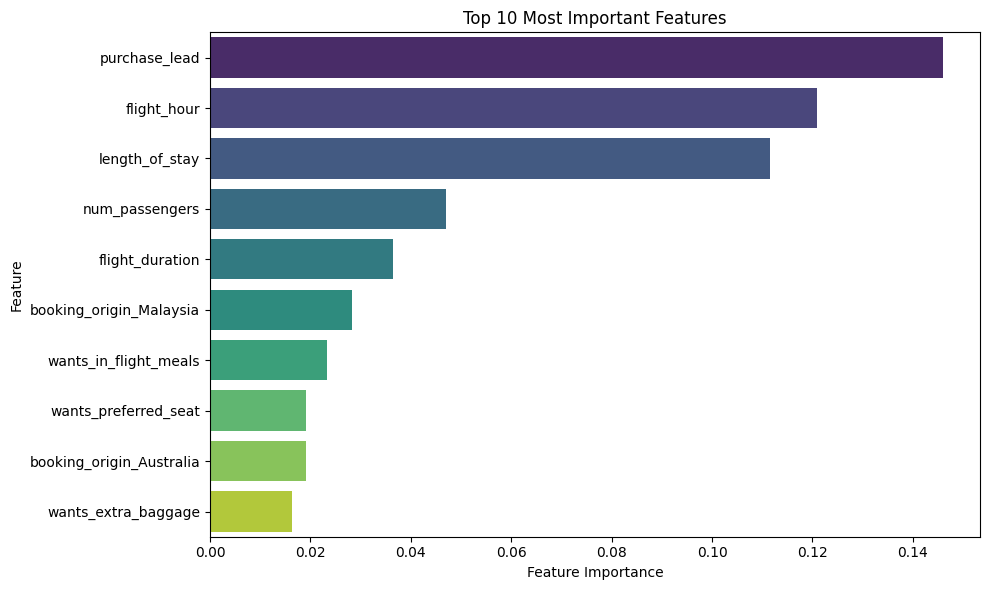

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 important features
top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [14]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [15]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1_macro')

print(f"Cross-Validated F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validated F1 Scores: [0.50059197 0.50518053 0.50266876 0.50237154 0.49281289]
Mean F1 Score: 0.50
Standard Deviation: 0.00


C:\Users\kshit\AppData\Local\Temp\ipykernel_13616\1750090765.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


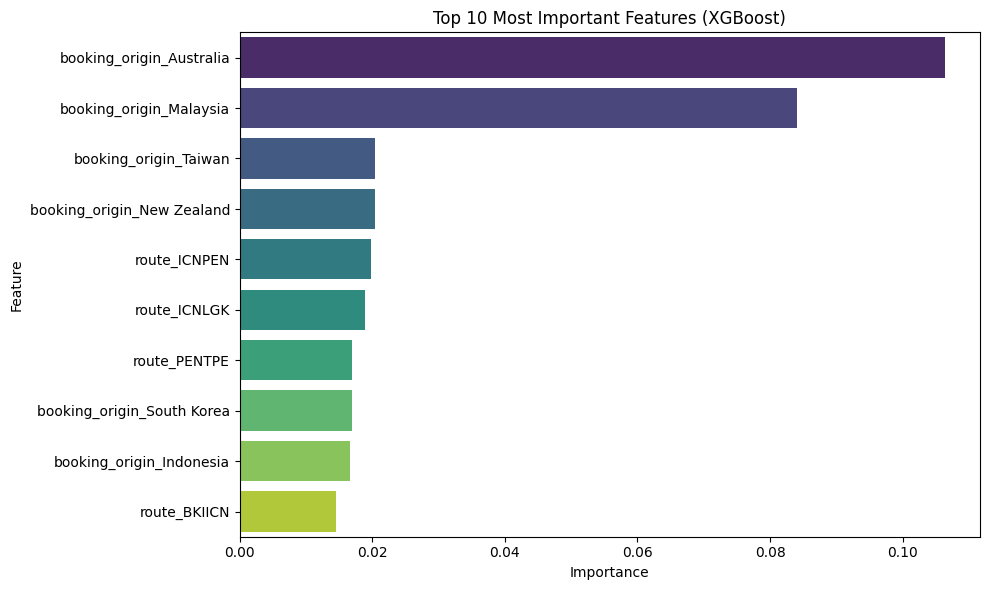

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.tight_layout()
plt.show()
